In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_train_csv = pd.read_csv('datasets/mnist_train.csv')
data_test_csv = pd.read_csv('datasets/mnist_test.csv')

In [3]:
# number of training samples
N_samples = 60000
# number of sample's features
N_features = 784
data_train = np.array(data_train_csv)[:N_samples].T
Y_train = data_train[0].copy()
X_train = data_train[1:].copy()/255

In [4]:
data_test = np.array(data_test_csv).T
Y_test = data_test[0].copy()
X_test = data_test[1:].copy() / 255

In [5]:
def initNetwork(K: int) -> (np.ndarray, np.ndarray, np.ndarray, np.ndarray):
    """
    Network initialization.
    
    This function initializes weights and biases for the network of shape 
    (784 - K - 10), where `784` is number of inputs with values in range [0, 1],
    `K` is a number of neurons in the hidden layer and `10` is a number of 
    output classes. Weights and biases are initialized with values from a 
    uniform distribution [0, 1) scaled to (-0.1, 0.1) range.
    
    ### Parameters:
    - `K: int` - number of neurons in the hidden layer
    
    ### Returns:
    - `W1: np.array` - weights matrix, `shape=(K, 784)` for the first layer
    - `b1: np.array` - biases matrix, `shape=(K, 1)` for the first layer
    - `W2: np.array` - weights matrix, `shape=(10, K)` for the second layer
    - `b2: np.array` - biases matrix, `shape=(10, 1)` for the second layer
    """
    W1 = np.random.rand(K, 784) * 0.2 - 0.1
    b1 = np.random.rand(K, 1) * 0.2 - 0.1
    W2 = np.random.rand(10, K) * 0.2 - 0.1
    b2 = np.random.rand(10, 1) * 0.2 - 0.1
    
    return W1, b1, W2, b2

def ReLU(U:np.ndarray):
    """
    Rectified linear unit (ReLU) function.
    
    Applies ReLU function elementwise to the input vector.
    """
    return np.maximum(U, 0)

def softmax(U:np.ndarray):
    """
    Softmax function.
    
    Applies Softmax function element-wise to the input vector.
    """
    exp = np.exp(U)
    return exp / sum(exp)

def forwardPropagation(X:np.ndarray, W1:np.ndarray, b1:np.ndarray, W2:np.ndarray, b2:np.ndarray):
    """
    Execute a forward propagation step.
    
    Starts a forward propagation step with the given parameters. On the network
    with of shape (784 - K - 10), where `784` is number of inputs with values in
    range [0, 1], `K` is a number of neurons in the hidden layer and `10` is a 
    number of output classes.
    
    ### Parameters:
    - `X: np.array` - input vector, `shape=(784, 1)`. Values in range [0, 1]
    - `W1: np.array` - weights matrix for the first layer (input -> hidden)
    - `b1: np.array` - biases matrix for the first layer (input -> hidden)
    - `W2: np.array` - weights matrix for the second layer (hidden -> output)
    - `b2: np.array` - biases matrix for the second layer (hidden -> output)
    
    ### Returns:
    - `U1: np.array` - pre-activation output of the first layer, `shape=(K, 1)`
    - `Y1: np.array` - output of the first layer with applied `ReLU` function
    - `U2: np.array` - pre-activation output of the first layer, `shape=(10, 1)`
    - `Y2: np.array` - output of the second layer with applied `softmax` function
    """
    U1 = W1.dot(X) + b1
    Y1 = ReLU(U1)
    U2 = W2.dot(Y1) + b2
    Y2 = softmax(U2)
    
    return U1, Y1, U2, Y2

def oneHot(Y):
    """
    Create a one-hot matrix for the given array.
    """
    n_elements = Y.size
    one_hot_Y = np.zeros((10, n_elements))
    one_hot_Y[Y, np.arange(n_elements)] = 1
    return one_hot_Y

def MSE(D):
    """
    Calculate the MSE for given array.
    
    ### Parameters:
    - `D: np.array` - array with values `A_1 - A_2`, where `A_1` and `A_2` are
    the two arrays, for which MSE is calculated.
    """
    return np.mean(np.square(D))

def ReLUDerivative(U):
    """
    Return the result of element-wise ReLU derivative calculation.
    """
    return U > 0

def backwardPropagation(U1, Y1, U2, Y2, W1, b1, W2, b2, X, Y):
    """
    Execute a backward propagation step.
    
    Starts a forward propagation step with the given parameters.
    
    ### Parameters:
    - `U1: np.array` - pre-activation output of the first layer, `shape=(K, 1)`
    - `Y1: np.array` - output of the first layer with applied `ReLU` function
    - `U2: np.array` - pre-activation output of the first layer, `shape=(10, 1)`
    - `Y2: np.array` - output of the second layer with applied `softmax` function
    - `W1: np.array` - weights matrix for the first layer (input -> hidden)
    - `b1: np.array` - biases matrix for the first layer (input -> hidden)
    - `W2: np.array` - weights matrix for the second layer (hidden -> output)
    - `b2: np.array` - biases matrix for the second layer (hidden -> output)
    - `X: np.array` - input vector, `shape=(784, 1)`. Values in range [0, 1]
    - `Y: np.array` - array of desired outputs (labels)
    
    ### Returns:
    - `dW1: np.array` - corrections for weights matrix of the first layer
    - `db1: np.array` - corrections for biases matrix of the first layer
    - `dW2: np.array` - corrections for weights matrix of the second layer
    - `db2: np.array` - corrections for biases matrix of the second layer
    - `error: float` - MSE of output compared to labels
    """
    n_samples = Y.size
    one_hot_Y = oneHot(Y)
    D2 = Y2 - one_hot_Y
    error = MSE(D2)
    dW2 = 1/n_samples * (2*D2).dot(Y1.T)
    db2 = 1/n_samples * 2 * np.sum(D2)
    D1 = W2.T.dot(D2) * ReLUDerivative(U1)
    dW1 = 1/n_samples * (2*D1).dot(X.T)
    db1 = 1/n_samples * 2 * np.sum(D1)
    
    return dW1, db1, dW2, db2, error

def updateParams(W1, b1, W2, b2, dW1, db1, dW2, db2, lr, dW1_prev, db1_prev, dW2_prev, db2_prev):
    """
    Update the weights matrices with given corrections.
    
    ### Parameters:
    - `W1: np.array` - weights matrix for the first layer (input -> hidden)
    - `b1: np.array` - biases matrix for the first layer (input -> hidden)
    - `W2: np.array` - weights matrix for the second layer (hidden -> output)
    - `b2: np.array` - biases matrix for the second layer (hidden -> output)
    - `dW1: np.array` - corrections for weights matrix of the first layer
    - `db1: np.array` - corrections for biases matrix of the first layer
    - `dW2: np.array` - corrections for weights matrix of the second layer
    - `db2: np.array` - corrections for biases matrix of the second layer
    - `lr: float` - learning rate
    
    ### Returns:
    - `W1: np.array` - updated weights matrix for the first layer
    - `b1: np.array` - updated biases matrix for the first layer
    - `W2: np.array` - updated weights matrix for the second layer
    - `b2: np.array` - updated biases matrix for the second layer
    """
    ndW1 = (lr * dW1 + (1-lr)*dW1_prev)
    ndb1 = (lr * db1 + (1-lr)*db1_prev)
    ndW2 = (lr * dW2 + (1-lr)*dW2_prev)
    ndb2 = (lr * db2 + (1-lr)*db2_prev)
    W1 -= ndW1
    b1 -= ndb1
    W2 -= ndW2
    b2 -= ndb2
    
    return W1, b1, W2, b2, ndW1, ndb1, ndW2, ndb2


    

In [6]:
def getPredictions(Y):
    """
    Get predictions from the NN output vector.
    
    ### Parameters:
    - `Y: np.array` - output of the NN
    
    ### Returns:
    - `np.array` - array of classes' numbers
    """
    
    return np.argmax(Y, 0)

def getAccuracy(pred, T):
    """
    Get accuracy of the NN
    
    ### Parameters:
    - `pred: np.array` - array of NN predictions
    - `T: np.array` - desired output (labels)
    
    ### Returns:
    - `float` - percent value of NN accuracy
    """
    
    return np.sum(pred==T)/T.size
    

def gradientDescent(X, Y, K, lr, iterations):
    """
    Train the neural network on given parameters for specified number of epochs
    
    ### Parameters:
    - `X: np.array` - input vector, `shape=(784, 1)`. Values in range [0, 1]
    - `Y: np.array' - array of desired outputs (labels)
    - `K: int` - number of neurons in the hidden layer
    - `lr: float` - learning rate
    - `iterations: int` - number of epochs
    
    
    ### Returns:
    - `W1: np.array` - trained weights matrix for the first layer
    - `b1: np.array` - trained biases matrix for the first layer
    - `W2: np.array` - trained weights matrix for the second layer
    - `b2: np.array` - trained biases matrix for the second layer
    """
    
    W1, b1, W2, b2 = initNetwork(K)
    for i in range(1, iterations+1):
        U1, Y1, U2, Y2 = forwardPropagation(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2, error = backwardPropagation(U1, Y1, U2, Y2, W1, b1, W2, b2, X, Y)
        W1, b1, W2, b2 = updateParams(W1, b1, W2, b2, dW1, db1, dW2, db2, lr)
        if i % 10 == 0:
            print(f"Epoch: {i}")
            predictions = getPredictions(Y2)
            print(f"MSE = {error}")
            print(f"Accuracy: {getAccuracy(predictions, Y)}%")
    
    return W1, b1, W2, b2

In [7]:
def makePredictions(X, W1, b1, W2, b2):
    _, _, _, Y2 = forwardPropagation(X, W1, b1, W2, b2)
    predictions = getPredictions(Y2)
    return predictions

def getTestAccuracy(TX, TY, W1, b1, W2, b2):
    predictions = makePredictions(TX, W1, b1, W2, b2)
    accuracy_test = getAccuracy(predictions, TY)
    return accuracy_test

def miniBatchGradientDescend(X, Y, K, lr, iterations, batchSize, TX, TY, decay=0):
    """
    Train the NN using given parameters for a given number of epochs using 
    mini-batch method.
    
    ### Parameters:
    - `X: np.array` - input vector, `shape=(784, 1)`. Values in range [0, 1]
    - `Y: np.array' - array of desired outputs (labels)
    - `K: int` - number of neurons in the hidden layer
    - `lr: float` - learning rate
    - `iterations: int` - number of epochs
    - `batchSize: int` - number of samples in mini-batch
    
    
    ### Returns:
    - `W1: np.array` - trained weights matrix for the first layer
    - `b1: np.array` - trained biases matrix for the first layer
    - `W2: np.array` - trained weights matrix for the second layer
    - `b2: np.array` - trained biases matrix for the second layer
    """
    W1, b1, W2, b2 = initNetwork(K)
    history = {"accuracy_train" : list(),
               "accuracy_test" : list(),
               "error" : list()}
    dW1_prev, db1_prev, dW2_prev, db2_prev = 0.0, 0.0, 0.0, 0.0
    for i in range(iterations):
        # divide given X dataset into smaller 'mini-batches'
        # 1) calculate the number of batches
        n_samples = X.shape[1]
        # a number of full mini-batches
        n_full_batches = n_samples // batchSize
        lr = lr * 1.0/(1.0 + decay*i)
        # the last mini-batch may not be of size `batchSize`
        for b in range(n_full_batches+1):
            mbatch_start = b * batchSize
            mbatch_end = mbatch_start + batchSize
            if b == n_full_batches:
                X_mini = X[:, mbatch_start:]
                Y_mini = Y[mbatch_start:]
            else:
                X_mini = X[:, mbatch_start:mbatch_end]
                Y_mini = Y[mbatch_start:mbatch_end]
            
            # after we have devided dataset into smaller batches
            # we have to train the NN on every batch
            # and update the parameters after every mini-batch
            U1, Y1, U2, Y2 = forwardPropagation(X_mini, W1, b1, W2, b2)
            dW1, db1, dW2, db2, error = backwardPropagation(U1, Y1, U2, Y2, W1, b1, W2, b2, X_mini, Y_mini)
            W1, b1, W2, b2, dW1_prev, db1_prev, dW2_prev, db2_prev = updateParams(W1, b1, W2, b2, dW1, db1, dW2, db2, lr, dW1_prev, db1_prev, dW2_prev, db2_prev)

        predictions = makePredictions(X, W1, b1, W2, b2)
        accuracy_train = getAccuracy(predictions, Y)
        accuracy_test = getTestAccuracy(TX, TY, W1, b1, W2, b2)
        
        history["accuracy_test"].append(accuracy_test)
        history["accuracy_train"].append(accuracy_train)
        error_limit = 0.0000001
        if error < error_limit:
            print(f"Error < {error_limit}")
            print(f"Epoch: {i}")
            print(f"MSE = {error}")
            print(f"Learning rate: {lr}")
            print(f"Accuracy: {accuracy_train}")
            break
        
        if i % 10 == 0:
            print(f"Epoch: {i}")
            print(f"MSE = {error}")
            print(f"Learning rate: {lr}")
            print(f"Accuracy: {accuracy_train}")
        
    return W1, b1, W2, b2, history, accuracy_test
            
                   

In [8]:
W1_mb, b1_mb, W2_mb, b2_mb, history, _ = miniBatchGradientDescend(X_train, Y_train, 256, 0.1, 200, 512, X_test, Y_test, 0.0001)
# 0.9817, 3m 23s
# W1_mb, b1_mb, W2_mb, b2_mb, history, _ = miniBatchGradientDescend(X_train, Y_train, 256, 0.1, 200, 512, X_test, Y_test, 0.0001)
# 98.44% 15m 57s
# W1_mb, b1_mb, W2_mb, b2_mb, history, _ = miniBatchGradientDescend(X_train, Y_train, 512, 0.1, 200, 256, X_test, Y_test, 0.0001)
# 97.95% on test set after training on 60,000 examples
# W1_mb, b1_mb, W2_mb, b2_mb, history = miniBatchGradientDescend(X_train, Y_train, 256, 0.05, 200, 512, X_test, Y_test, 0.0001)
# 96.86% test accuracy
# W1_mb, b1_mb, W2_mb, b2_mb, history = miniBatchGradientDescend(X_train, Y_train, 128, 0.05, 200, 512, X_test, Y_test, 0.0001)


Epoch: 0
MSE = 0.0061872099939916
Learning rate: 0.1
Accuracy: 0.95115
Epoch: 10
MSE = 7.849025206780635e-05
Learning rate: 0.09945170107501497
Accuracy: 0.9911
Epoch: 20
MSE = 3.499248221889855e-06
Learning rate: 0.09792330020853654
Accuracy: 0.99835
Epoch: 30
MSE = 1.0084857817537375e-06
Learning rate: 0.09546096199983982
Accuracy: 0.9999833333333333
Epoch: 40
MSE = 1.9373970375064409e-07
Learning rate: 0.09213737431370209
Accuracy: 1.0
Error < 1e-07
Epoch: 50
MSE = 9.552334738873196e-08
Learning rate: 0.08804818934142708
Accuracy: 1.0


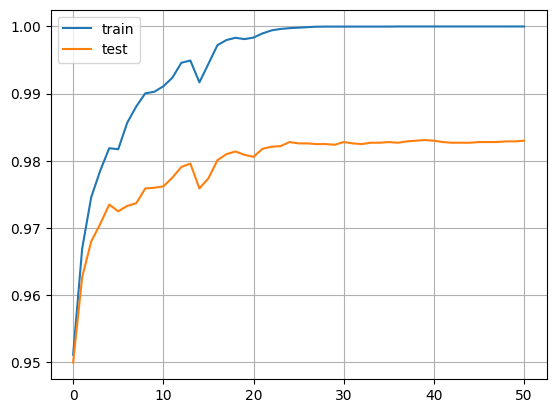

In [9]:
plt.plot(history["accuracy_train"], label="train")
plt.plot(history["accuracy_test"], label="test")
plt.grid(True)
plt.legend()
plt.show()

In [10]:
def makePredictions(X, W1, b1, W2, b2):
    _, _, _, Y2 = forwardPropagation(X, W1, b1, W2, b2)
    predictions = getPredictions(Y2)
    return predictions

def testPrediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = makePredictions(current_image, W1, b1, W2, b2)
    label = Y_train[index]
    # print(f"Prediction: {LABELS[prediction]}")
    # print(f"Label: {LABELS[label]}")
    print(f"Prediction: {prediction}")
    print(f"Label: {label}")
    
    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image)
    plt.show()

In [11]:
learning_rates = [0.1,]
decay = [0.01, 0.001, 0.0001]
hidden_neurons = [256,]
batch_size = [256, 512, 1024]


In [12]:
def tuneHyperParams():
    result = dict()
    for lr in learning_rates:
        for d in decay:
            for hn in hidden_neurons:
                for bs in batch_size:
                    _, _, _, _, _, acc_test = miniBatchGradientDescend(X_train, Y_train, hn, lr, 200, bs, X_test, Y_test, d)
                    result[f"lr={lr}, decay={d}, hidden_s={hn}, batch_s={bs}"] = acc_test
                    print(f"lr={lr}, decay={d}, hidden_s={hn}, batch_s={bs}, accuracy = {acc_test}")
    return result

In [13]:
result = tuneHyperParams()

Epoch: 0
MSE = 0.006226024638329388
Learning rate: 0.1
Accuracy: 0.9565833333333333
Epoch: 10
MSE = 0.00015193078410584692
Learning rate: 0.05876057133739339
Accuracy: 0.9926833333333334
Epoch: 20
MSE = 0.00034853843663645254
Learning rate: 0.01395114355303044
Accuracy: 0.9980333333333333
Error < 1e-07
Epoch: 21
MSE = 5.901909955590144e-08
Learning rate: 0.011529870704983835
Accuracy: 0.9979333333333333
lr=0.1, decay=0.01, hidden_s=256, batch_s=256, accuracy = 0.9792
Epoch: 0
MSE = 0.0077676648648154455
Learning rate: 0.1
Accuracy: 0.9461833333333334
Epoch: 10
MSE = 0.00023403198207953526
Learning rate: 0.05876057133739339
Accuracy: 0.9883
Epoch: 20
MSE = 4.3257808895070455e-05
Learning rate: 0.01395114355303044
Accuracy: 0.9961666666666666
Epoch: 30
MSE = 0.0003109275940266356
Learning rate: 0.0014431467596501654
Accuracy: 0.9972166666666666
Epoch: 40
MSE = 5.632040119575005e-05
Learning rate: 6.932560463176203e-05
Accuracy: 0.9919


KeyboardInterrupt: 

In [ ]:
sorted_result = {k:v for k, v in sorted(result.items(), key=lambda x: x[1], reverse=True)}
for k, v in sorted_result.items():
    print(f"{k} : Test Accuracy = {v}")

lr=0.1, decay=0.0001, hidden_s=256, batch_s=256 : Test Accuracy = 0.9698
lr=0.1, decay=0.0001, hidden_s=256, batch_s=1024 : Test Accuracy = 0.9693
lr=0.1, decay=0.001, hidden_s=256, batch_s=1024 : Test Accuracy = 0.9675
lr=0.1, decay=0.001, hidden_s=256, batch_s=256 : Test Accuracy = 0.967
lr=0.1, decay=0.01, hidden_s=256, batch_s=256 : Test Accuracy = 0.9659
lr=0.1, decay=0.01, hidden_s=256, batch_s=512 : Test Accuracy = 0.9647
lr=0.1, decay=0.0001, hidden_s=256, batch_s=512 : Test Accuracy = 0.9646
lr=0.1, decay=0.001, hidden_s=256, batch_s=512 : Test Accuracy = 0.9628
lr=0.1, decay=0.01, hidden_s=256, batch_s=1024 : Test Accuracy = 0.5176


Prediction: [7]
Label: 7


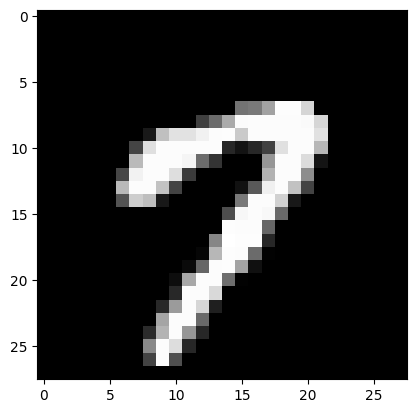

Prediction: [8]
Label: 8


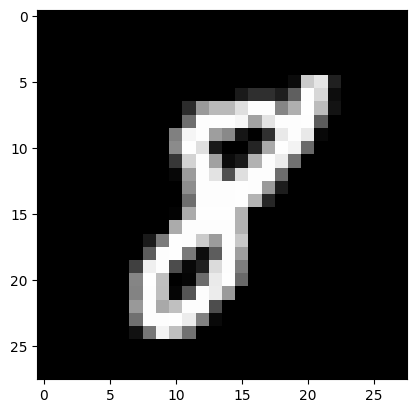

Prediction: [9]
Label: 9


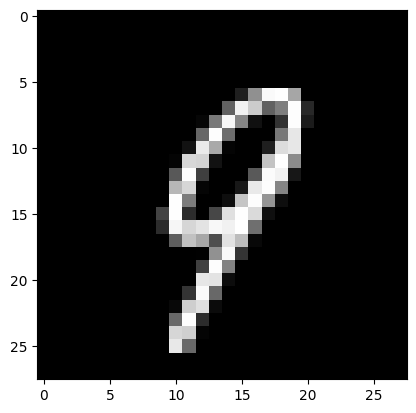

In [ ]:
# testPrediction(0, W1, b1, W2, b2)
# testPrediction(1, W1, b1, W2, b2)
# testPrediction(2, W1, b1, W2, b2)
testPrediction(15, W1_mb, b1_mb, W2_mb, b2_mb)
testPrediction(17, W1_mb, b1_mb, W2_mb, b2_mb)
testPrediction(22, W1_mb, b1_mb, W2_mb, b2_mb)

In [14]:
test_predictions = makePredictions(X_test, W1_mb, b1_mb, W2_mb, b2_mb)
getAccuracy(test_predictions, Y_test)
# getTestAccuracy(X_test, Y_test, W1_mb, b1_mb, W2_mb, b2_mb)

0.983